In [5]:
import yfinance as yf
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#using yahoo finace API


In [7]:
ticker = 'AAPL'
end_date = datetime.today().strftime('%Y-%m-%d')  # Get current date in 'YYYY-MM-DD' format
data = yf.download(ticker, start="2020-01-01", end=end_date)

# Display the data
print(data)

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2020-01-02   72.796013   75.087502   75.150002   73.797501   74.059998   
2020-01-03   72.088280   74.357498   75.144997   74.125000   74.287498   
2020-01-06   72.662689   74.949997   74.989998   73.187500   73.447502   
2020-01-07   72.320984   74.597504   75.224998   74.370003   74.959999   
2020-01-08   73.484337   75.797501   76.110001   74.290001   74.290001   
...                ...         ...         ...         ...         ...   
2024-12-02  239.589996  239.589996  240.789993  237.160004  237.270004   
2024-12-03  242.649994  242.649994  242.759995  238.899994  239.809998   
2024-12-04  243.009995  243.009995  244.110001  241.250000  242.869995   
2024-12-05  243.039993  243.039993  244.539993  242.130005  243.990005   
2024-12-06  242.839996  242.839996  24

In [8]:
#Checking for duplicates and nulls
print(data.duplicated().sum())
data.isnull().sum()

0


Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [9]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1.242000e+03
mean,151.067065,152.853639,154.404596,151.135352,152.708084,9.112097e+07
std,40.843842,40.274596,40.412741,40.077874,40.244996,5.328508e+07
min,54.509766,56.092499,57.125000,53.152500,57.020000,2.404830e+07
25%,126.072412,128.994995,130.457497,127.017500,128.807499,5.596832e+07
50%,150.085510,151.989998,153.900002,150.195000,152.004997,7.662695e+07
75%,176.398396,177.812504,179.467495,176.240002,177.470001,1.082378e+08
max,243.039993,243.039993,244.630005,242.130005,243.990005,4.265100e+08


In [10]:
print(data.shape)

(1242, 6)


In [11]:
#lets get the average high for the month of january in 2022
data.index = pd.to_datetime(data.index)
condition1 = (data.index>='2022-01-01') & (data.index <="2022-01-31")
jan_data = data[condition1]
average_jan_high = jan_data['High'].mean()
print(average_jan_high)
#Using groupby
average = data.groupby(pd.Grouper(freq = 'M')).mean()
print(average)
average_jan_high2 = average.loc['2022-1-31','High']
print('Average High for January 2022: ',average_jan_high)





Ticker
AAPL    172.447999
dtype: float64
Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2020-01-31   75.599321   77.979048   78.581547   77.207857   77.792738   
2020-02-29   75.583309   77.817631   78.813158   76.681579   77.578421   
2020-03-31   63.759702   65.611023   67.423181   63.711591   65.268410   
2020-04-30   66.175094   68.096547   68.945357   67.021072   67.952857   
2020-05-31   75.464751   77.496376   78.312875   76.595250   77.221375   
2020-06-30   84.239637   86.451590   87.336250   85.160681   86.135341   
2020-07-31   93.121093   95.566250   96.586818   94.265682   95.417500   
2020-08-31  114.467582  117.299762  118.565596  115.556666  116.969881   
2020-09-30  112.381901  115.125237  118.036190  112.584762  116.079048   
2020-10-31  113.639157  116.413182  118.274546  114.911363  116.694090 

C:\Users\Angel\AppData\Local\Temp\ipykernel_29956\196658873.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  average = data.groupby(pd.Grouper(freq = 'M')).mean()


In [12]:
#Obtaining the average for each month 
#average = data.groupby(pd.Grouper(freq = 'M')).mean()
#print(average) 
monthly_average_high = data['High'].groupby(pd.Grouper(freq = 'M')).mean()

data.index = pd.to_datetime(data.index)

# Group by month and calculate the average High for each month
monthly_average_high = data['High'].groupby(pd.Grouper(freq='M')).mean()

# Ensure the index of the grouped data is a DatetimeIndex
monthly_average_high.index = pd.to_datetime(monthly_average_high.index)

# Print the average High for each month
for month, avg_high in monthly_average_high.items():
    month_str = f"{month.month}-{month.year}"  # Access month and year attributes
    print(f"{month_str}: {avg_high:.2f}")



C:\Users\Angel\AppData\Local\Temp\ipykernel_29956\2848844211.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_high = data['High'].groupby(pd.Grouper(freq = 'M')).mean()
C:\Users\Angel\AppData\Local\Temp\ipykernel_29956\2848844211.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_average_high = data['High'].groupby(pd.Grouper(freq='M')).mean()


AttributeError: 'str' object has no attribute 'month'

Examining the Prices


In [13]:
#Obtaining the lowest priced stock
lowest_stock = data.loc[data['Low'].idxmin()]
print('Lowest priced stock\n',lowest_stock)
highest_stock = data.loc[data['High'].idxmax()]
print('Highest priced stock\n',highest_stock)



Lowest priced stock
 Price       Adj Close      Close    High      Low   Open     Volume
Ticker           AAPL       AAPL    AAPL     AAPL   AAPL       AAPL
Date                                                               
2020-03-23  54.509766  56.092499  57.125  53.1525  57.02  336752800
Highest priced stock
 Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2024-12-06  242.839996  242.839996  244.630005  242.080002  242.910004   

Price         Volume  
Ticker          AAPL  
Date                  
2024-12-06  36852100  


In [14]:
print(data.index)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2024-11-22', '2024-11-25', '2024-11-26', '2024-11-27',
               '2024-11-29', '2024-12-02', '2024-12-03', '2024-12-04',
               '2024-12-05', '2024-12-06'],
              dtype='datetime64[ns]', name='Date', length=1242, freq=None)


In [15]:
data.reset_index(inplace=True)
print(data.columns) 

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])


<Axes: xlabel='Date'>

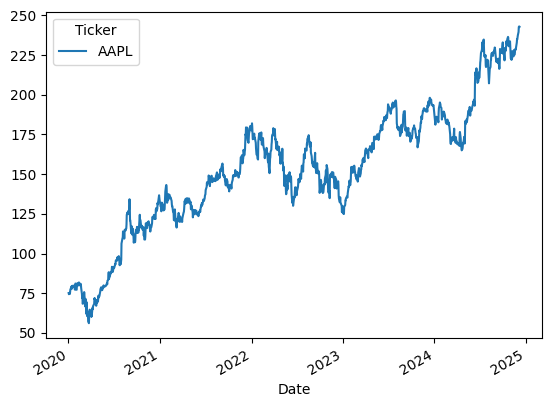

In [16]:

data.plot(kind='line', x='Date', y='Close')

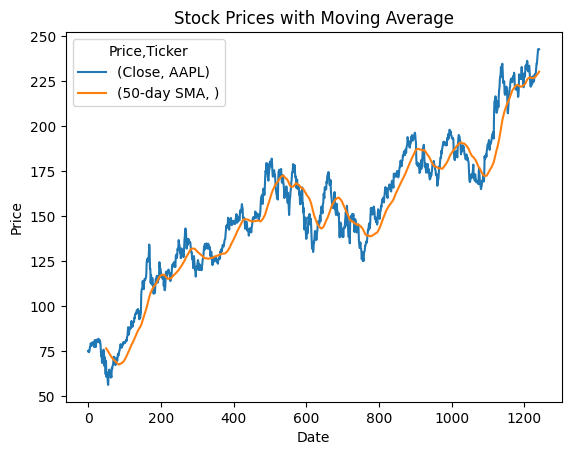

In [17]:
#Find the moving avergage 

data['50-day SMA'] = data['Close'].rolling(window=50).mean()

# Plot the closing prices and the 50-day SMA
data[['Close', '50-day SMA']].plot(kind='line', title="Stock Prices with Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


MultiIndex([(             'Date',     ''),
            (        'Adj Close', 'AAPL'),
            (            'Close', 'AAPL'),
            (             'High', 'AAPL'),
            (              'Low', 'AAPL'),
            (             'Open', 'AAPL'),
            (           'Volume', 'AAPL'),
            (       '50-day SMA',     ''),
            (     'Daily Return',     ''),
            ('30-day Volatility',     '')],
           names=['Price', 'Ticker'])
Price              Ticker
Daily Return                  1
30-day Volatility            30
dtype: int64


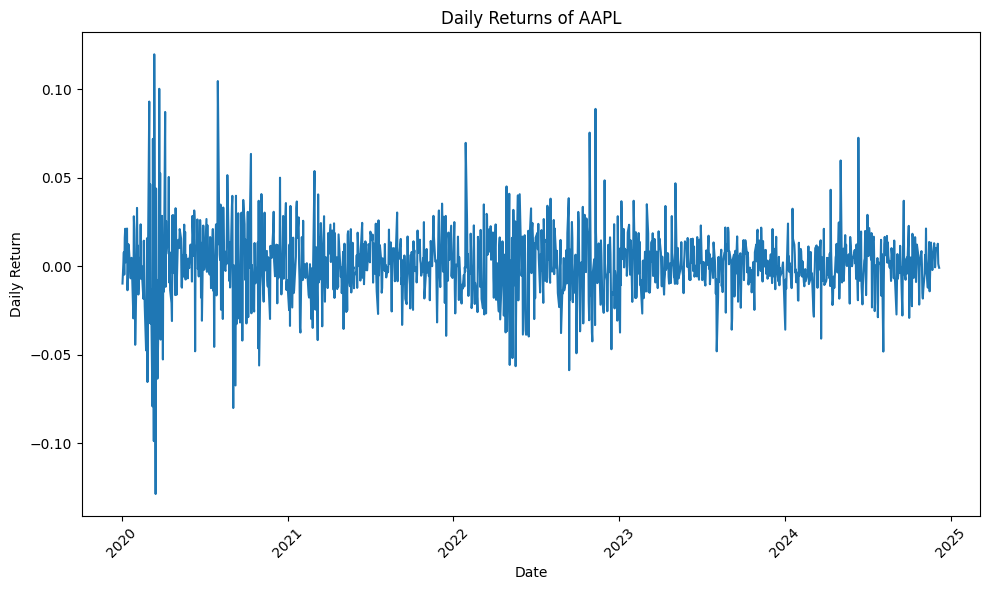

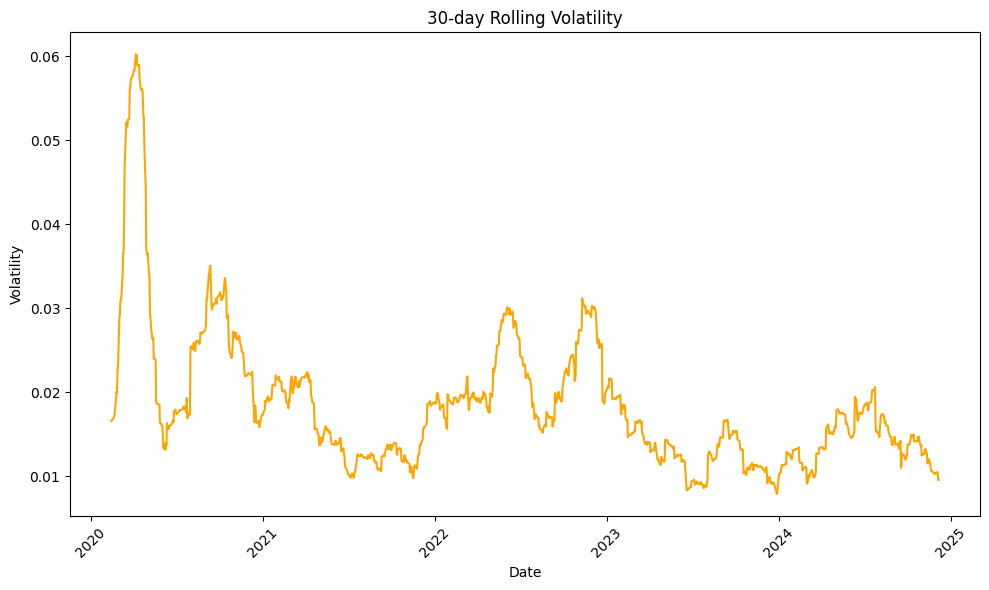

In [18]:


data['Daily Return'] = data['Close'].pct_change()
data['30-day Volatility'] = data['Daily Return'].rolling(window=30).std()

# Verify that the columns exist and are correctly calculated
print(data.columns)  # This will show you all the columns in the DataFrame

# Check if NaN values exist
print(data[['Daily Return', '30-day Volatility']].isnull().sum())  # Count NaNs

# Plot daily returns with 'Date' as the x-axis
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Daily Return'], label="Daily Return")
plt.title("Daily Returns of AAPL")
plt.xlabel("Date")
plt.ylabel("Daily Return")

# Format the x-axis to display dates properly
plt.xticks(rotation=45)  # Rotate the dates for better readability
plt.tight_layout()  # Adjust layout to make sure labels fit
plt.show()

# Plot rolling volatility with 'Date' as the x-axis
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['30-day Volatility'], label="30-day Volatility", color='orange')
plt.title("30-day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")

# Format the x-axis to display dates properly
plt.xticks(rotation=45)  # Rotate the dates for better readability
plt.tight_layout()  # Adjust layout to make sure labels fit
plt.show()



Value at Risk (95% confidence): -0.0305


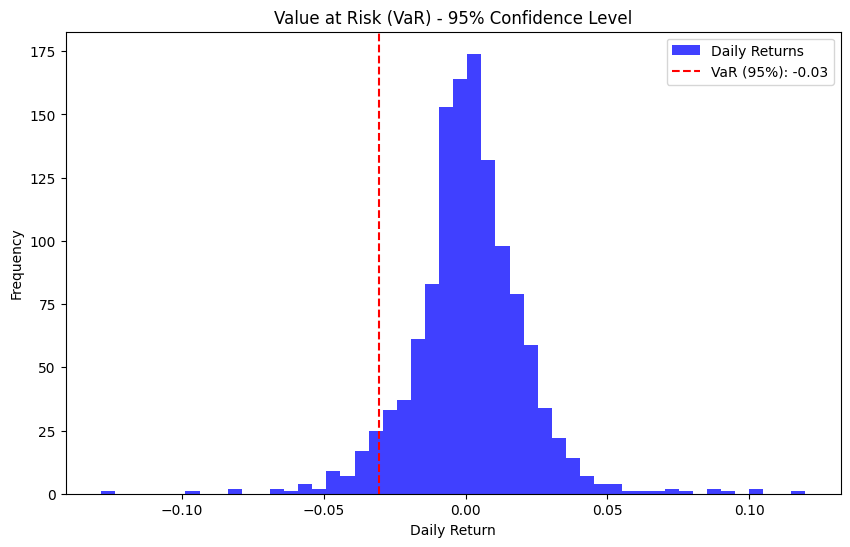

In [19]:


# Assume Daily Return is calculated
confidence_level = 0.05  # 5% VaR
var_95 = np.percentile(data['Daily Return'].dropna(), confidence_level * 100)

print(f"Value at Risk (95% confidence): {var_95:.4f}")

# Plot histogram of returns with VaR
plt.figure(figsize=(10, 6))
plt.hist(data['Daily Return'].dropna(), bins=50, alpha=0.75, color='blue', label="Daily Returns")
plt.axvline(var_95, color='red', linestyle='--', label=f"VaR (95%): {var_95:.2f}")
plt.title("Value at Risk (VaR) - 95% Confidence Level")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [23]:
# Drop NaN values from Daily Return
daily_returns = data['Daily Return'].dropna()

# Generate market returns with the same length as daily_returns
market_returns = np.random.normal(0, 0.01, len(daily_returns))

# Calculate covariance and variance
cov_matrix = np.cov(daily_returns, market_returns)
beta = cov_matrix[0, 1] / cov_matrix[1, 1]  # Covariance / Market Variance

print(f"Beta of the stock: {beta:.4f}")



Beta of the stock: -0.0887


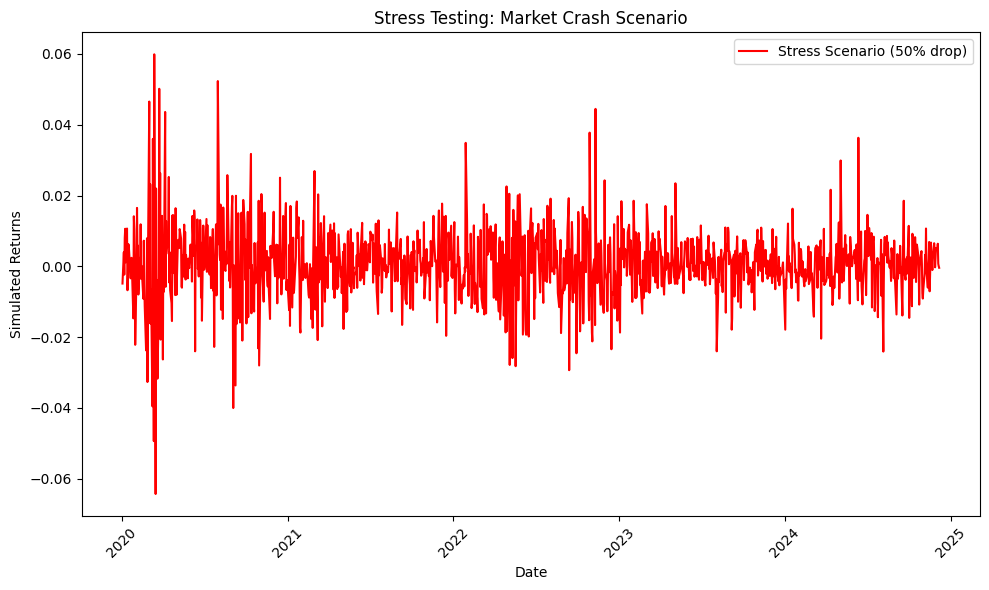

In [21]:
stress_scenario = data['Daily Return'] * 0.5  # Assume returns drop by 50%

# Plot stress scenario
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], stress_scenario, color='red', label='Stress Scenario (50% drop)')
plt.title("Stress Testing: Market Crash Scenario")
plt.xlabel("Date")
plt.ylabel("Simulated Returns")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

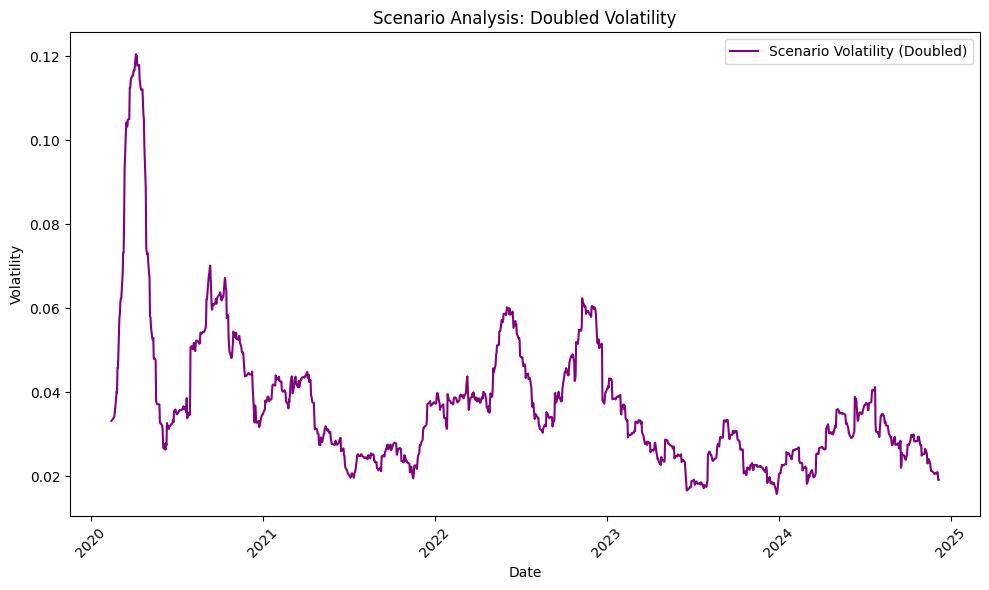

In [22]:
# Double the volatility scenario
data['Scenario Volatility'] = data['Daily Return'].rolling(window=30).std() * 2

# Plot scenario analysis
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Scenario Volatility'], color='purple', label='Scenario Volatility (Doubled)')
plt.title("Scenario Analysis: Doubled Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
